# Обучение нейрона с помощью функции потерь LogLoss

<h3 style="text-align: center;"><b>Нейрон с сигмоидой</b></h3>

Снова рассмотрим нейрон с сигмоидой, то есть $$f(x) = \sigma(x)=\frac{1}{1+e^{-x}}$$

Ранее мы установили, что **обучение нейрона с сигмоидой с квадратичной функцией потерь**:  

$$MSE(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)^2$$    

где $w \cdot x_i$ - скалярное произведение, а $\sigma(w \cdot x_i) =\frac{1}{1+e^{-w \cdot x_i}} $ - сигмоида -- **неэффективно**, то есть мы увидели, что даже за большое количество итераций нейрон предсказывает плохо.

Давайте ещё раз взглянем на формулу для градиентного спуска от функции потерь $MSE$ по весам нейрона:

$$ \frac{\partial MSE}{\partial w} = \frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

А теперь смотрим на график сигмоиды:

<img src="https://cdn-images-1.medium.com/max/1200/1*IDAnCFoeXqWL7F4u9MJMtA.png" width=500px height=350px>

**Её значения: числа от 0 до 1.**

Если получше проанализировать формулу, то теперь можно заметить, что, поскольку сигмоида принимает значения между 0 и 1 (а значит (1-$\sigma$) тоже принимает значения от 0 до 1), то мы умножаем $X^T$ на столбец $(\sigma(w \cdot X) - y)$ из чисел от -1 до 1, а потом ещё на столбцы $\sigma(w \cdot X)$ и $(1 - \sigma(w \cdot X))$ из чисел от 0 до 1. Таким образом в лучшем случае $\frac{\partial{Loss}}{\partial{w}}$ будет столбцом из чисел, порядок которых максимум 0.01 (в среднем, понятно, что если сигмоида выдаёт все 0, то будет 0, если все 1, то тоже 0). После этого мы умножаем на шаг градиентного спуска, который обычно порядка 0.001 или 0.1 максимум. То есть мы вычитаем из весов числа порядка ~0.0001. Медленновато спускаемся, не правда ли? Это называют **проблемой затухающих градиентов**.

Чтобы избежать эту проблему в задачах классификации, в которых моделью является нейрон с сигмоидной функцией активации, предсказывающий "вероятности" принадлженостей к классам используют **LogLoss**:  

$$J(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\sigma(w \cdot x_i)) + (1 - y_i) \log(1 - \sigma(w \cdot x_i))$$

где, как и прежде, $y$ - столбец $(n, 1)$ из истинных значений классов, а $\hat{y}$ - столбец $(n, 1)$ из предсказаний нейрона.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [ ]:
def loss(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

Отметим, что сейчас речь идёт именно о **бинарной классификации (на два класса)**, в многоклассовой классификации используется функция потерь под названием *кросс-энтропия*, которая является обобщением LogLoss'а на случай нескольких классов.

Почему же теперь всё будет лучше? Раньше была проблема умножения маленьких чисел в градиенте. Давайте посмотрим, что теперь:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} =
-\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)(\sigma(w \cdot x_i))_{w_j}' = -\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij} = $$
$$-\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{ij}$$

* Градиент $Loss$'а по вектору весов -- это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$ (помним, что весов всего $m$):

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i1} \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i2} \\
           \vdots \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{im}
         \end{bmatrix}
\end{align}=\frac{1}{n} X^T \left(\hat{y} - y\right)$$

По аналогии с $w_j$ выведите формулу для свободного члена (bias'а) $b$ (*hint*: можно считать, что при нём есть признак $x_{i0}=1$ на всех $i$).

$$ \frac{\partial Loss}{\partial w_0} = -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i0} = -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)=$$
$$=-\frac{1}{n} \sum_{i=1}^n \left(y_i - \hat y\right)$$

Получили новое правило для обновления $w$ и $b$.

In [ ]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

Реализуйте нейрон с функцией потерь LogLoss:

In [ ]:
class Neuron:

    def __init__(self, w=None, b=0, learning_rate=0.1, num_epochs=5000):
        """
        :param: w -- вектор весов
                b -- смещение
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
                num_epochs -- количество итераций обучения
        """
        # пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs


    def activate(self, x):
        return sigmoid(x)


    def forward_pass(self, X):
        """
        Эта функция рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)


    def backward_pass(self, X, y, y_pred):
        """
        Обновляет значения весов нейрона в соответствие с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - self.learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - self.learning_rate * np.mean(y_pred - y)


    def fit(self, X, y):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
        :return: J_values -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов

        for i in range(self.num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass(X)
            # считаем функцию потерь с текущими весами
            loss_values.append(loss(y_pred, y))
            # обновляем веса по формуле градиентного спуска
            self.backward_pass(X, y, y_pred)

        return loss_values

    def predict(self, X):
        """
          Эта функция предугадывает значения целевой переменной по данному объекту
          :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
          :return: вектор размера (n, 1) с ответами нейрона
        """
        return np.around(self.forward_pass(X))


<h3 style="text-align: center;"><b>Тестирование</b></h3>

Протестируем нейрон, обученный с новой функцией потерь, на тех же данных, что и в предыдущем ноутбуке:

**Проверка forward_pass()**

In [ ]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = Neuron(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]


**Проверка backward_pass()**

In [ ]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [ ]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.9001544 ]
 [1.76049276]]
b = 1.9998544421863216


Проверьте на наборах данных "яблоки и груши" и "голос".

## Яблоки и груши

Хочу заметить, что "Яблоки и груши" очень мило звучат. А хорошие и милые вещи нужно ценить, особенно в такие тяжелые времена как сейчас.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MMMO/Data/apples_pears.csv')
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


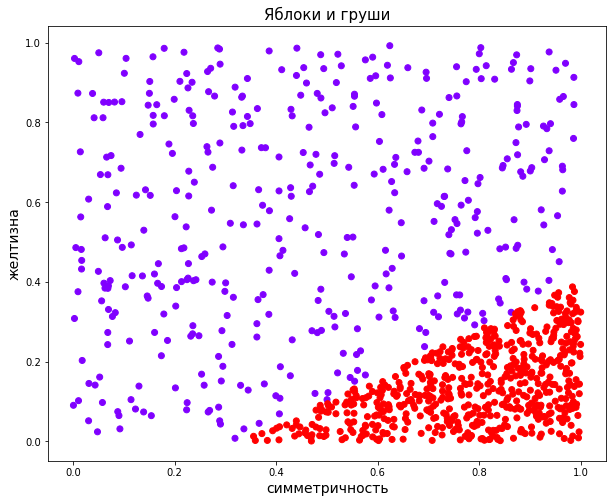

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [ ]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

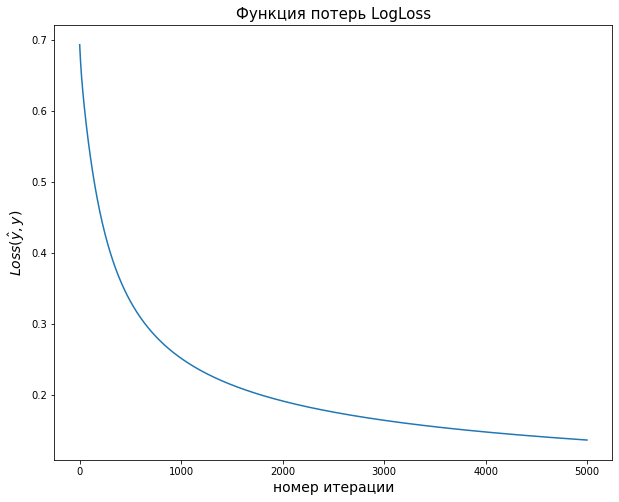

CPU times: user 1.06 s, sys: 10.2 ms, total: 1.07 s
Wall time: 1.08 s


In [ ]:
%%time

neuron = Neuron()
losses = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь LogLoss', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)

plt.show()

Как можно заметить, у LogLoss график более искривлен, нежели у MSE

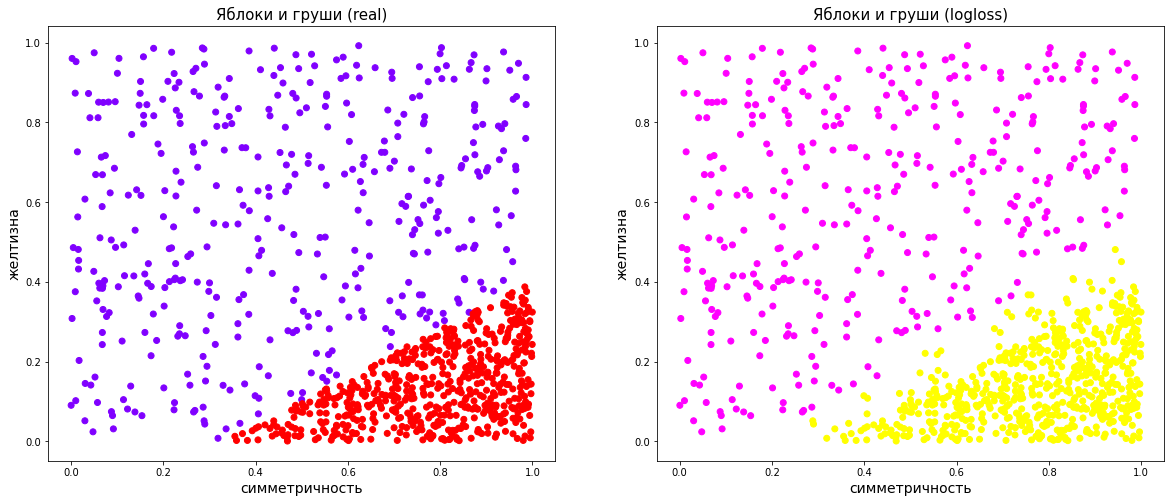

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши (real)', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X).ravel(), cmap='spring')
plt.title('Яблоки и груши (logloss)', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)

plt.show();

Попробую протестировать нейрон на большем числе эпох

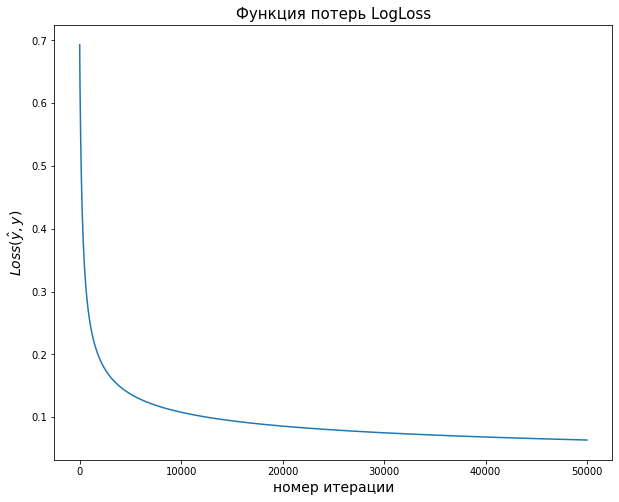

CPU times: user 7.22 s, sys: 42.2 ms, total: 7.26 s
Wall time: 7.28 s


In [ ]:
%%time

neuron_50000 = Neuron(num_epochs=50000)
losses_50000 = neuron_50000.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses_50000)
plt.title('Функция потерь LogLoss', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)

plt.show()

График функции потерь стал более выгнутым

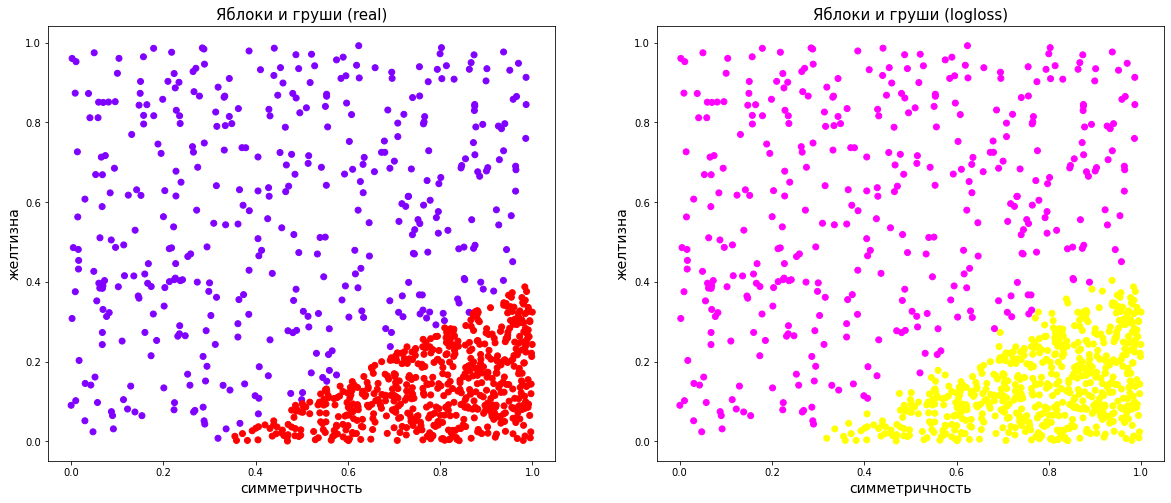

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши (real)', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)

plt.subplot(1, 2, 2)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron_50000.predict(X).ravel(), cmap='spring')
plt.title('Яблоки и груши (logloss)', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)

plt.show();

А предсказания немного улучшились

In [ ]:
from sklearn.metrics import accuracy_score

dic = {
    'accuracy': [accuracy_score(y, neuron.predict(X).ravel()), accuracy_score(y, neuron_50000.predict(X).ravel())]
}

pd.DataFrame(data=dic, index=[['Neuron (num_epochs=5000)', 'Neuron (num_epochs=50000)']])

,accuracy
Neuron (num_epochs=5000),0.956
Neuron (num_epochs=50000),0.976


## Голоса

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MMMO/Data/voice.csv')
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)
print(data.shape)
data.head()

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1).values, data['label'].values, test_size=0.33, random_state=42)

In [ ]:
neuron_voices = Neuron()
neuron_voices.fit(X_train, y_train)

y_pred_voices = neuron_voices.predict(X_test)

accuracy_score(y_test, y_pred_voices)

0.5745697896749522

Результаты получились не очень. Все из-за того что мы не предобработали данные

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
standart_scaler = StandardScaler()

minmax_scaler = MinMaxScaler()

In [ ]:
X_std = standart_scaler.fit_transform(data.drop('label', axis=1))

X_mmx = minmax_scaler.fit_transform(data.drop('label', axis=1))

In [ ]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, data['label'].values, test_size=0.33, random_state=42)

X_train_mmx, X_test_mmx, y_train_mmx, y_test_mmx = train_test_split(X_mmx, data['label'].values, test_size=0.33, random_state=42)

In [ ]:
neuron_std = Neuron()
losses_std = neuron_std.fit(X_train_std,  y_train_std)

In [ ]:
neuron_mmx = Neuron()
losses_mmx = neuron_mmx.fit(X_train_mmx,  y_train_mmx)

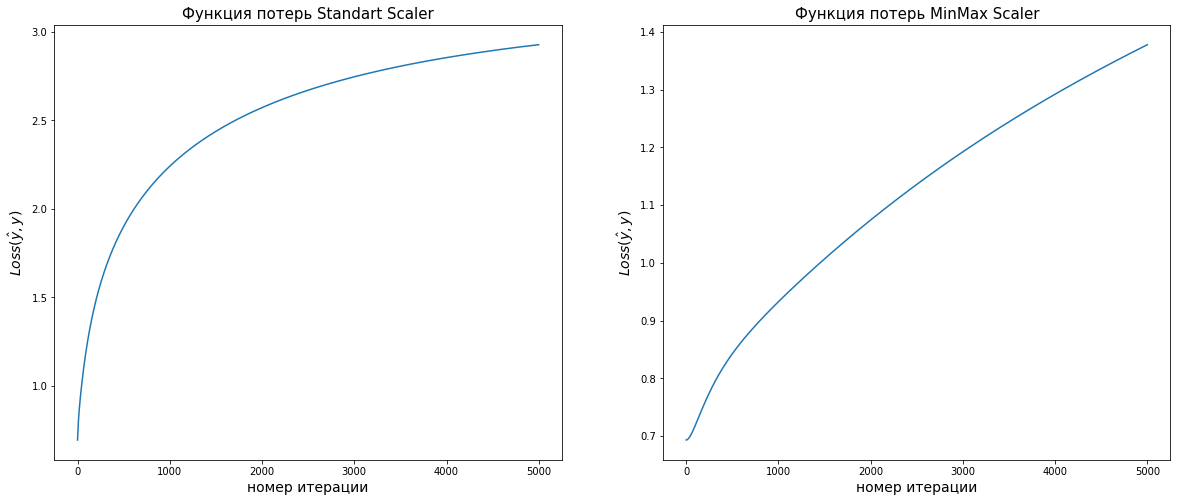

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(losses_std)
plt.title('Функция потерь Standart Scaler', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(losses_mmx)
plt.title('Функция потерь MinMax Scaler', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)

plt.show();

In [ ]:
y_pred_std = neuron_std.predict(X_test_std)

accuracy_score(y_test_std, y_pred_std)

0.9703632887189293

In [ ]:
y_pred_mmx = neuron_mmx.predict(X_test_mmx)

accuracy_score(y_test_mmx, y_pred_mmx)

0.9694072657743786

Как можно заметить, StandartScaler справился с этой работой лучше, нежели MinMaxScaler

P.S. Происходит очень странная тенденция к увеличению графика Loss функции при достаточно высоком accuracy. Почему такое происходит остается для меня загадкой, хотя интересно было бы понять почему

# Сравнение с моделями из коробки

In [ ]:
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

# keras является оболочкой для более низкоуровневых библиотек,
# в нашем случае мы используем tensorflow, у которого на данный момент
# поддерживаются две версии, установим первую
import tensorflow as tf

Для набора яблоки и груши:

In [ ]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,)))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=5000)

In [ ]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9840


[0.04176713526248932, 0.984000027179718]

Как можно заметить, при количестве эпох 5000 наша модель показывает *accuracy=0.956*, а модель из коробки *accuracy=0.984*

Произведем те же манипуляции с датасетом голоса:

In [ ]:
model_v = Sequential()
model_v.add(Dense(units=1, input_shape=(20,)))
model_v.add(Activation('sigmoid'))

model_v.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_v.fit(X_train_std, y_train_std, epochs=5000)

In [ ]:
model_v.evaluate(X_test_std, y_test_std)

33/33 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9694


[0.10093747079372406, 0.9694072604179382]

Как можно заметить, при количестве эпох 5000 наша модель показывает на тестовом датасете *accuracy=0.97*, а модель из коробки *accuracy=0.9694*. Можно поздравить, мы победили машин! (или нет)